# SmallDiffusion.jl

In [ ]:
using Pkg
Pkg.add(["CSV", "DataFrames", "Flux", "Plots", "MLDatasets", "CUDA", "LinearAlgebra", "Statistics", "Random"])

#Pkg.develop(path="/Users/chenwanqiu/Downloads/baibaibai/src/SmallDiffusion.jl")
include("/Users/chenwanqiu/Downloads/baibaibai/src/SmallDiffusion.jl")

using .SmallDiffusion
using Plots
using Statistics
using Random



   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


TaskLocalRNG()

## 2. support function


In [2]:

function plot_batch(batch)
    scatter(batch[:, 1], batch[:, 2], markersize=2, legend=false, aspect_ratio=:equal)
end

function moving_average(x, w)
    return [mean(x[max(1, i-w+1):i]) for i in 1:length(x)]
end

moving_average (generic function with 1 method)

## 3. loading data


Float32[0.0 0.0; 0.010009508 0.000100198624; 0.020016007 0.00040077438; 0.030016491 0.0009016672; 0.040007945 0.0016027763; 0.049987376 0.0025039618; 0.05995177 0.0036050428; 0.06989813 0.0049057985; 0.07982344 0.006405967; 0.08972474 0.008105249; 0.09959902 0.010003305; 0.109443285 0.012099752; 0.119254574 0.014394171; 0.12902988 0.016886098; 0.13876627 0.01957504; 0.14846075 0.02246045; 0.15811038 0.02554175; 0.16771223 0.028818332; 0.17726332 0.03228952; 0.18676074 0.035954632; 0.19620156 0.03981292; 0.20558286 0.043863613; 0.21490178 0.048105903; 0.22415534 0.052538928; 0.23334074 0.057161797; 0.24245508 0.06197358; 0.25149548 0.066973306; 0.26045913 0.07215997; 0.26934317 0.07753254; 0.27814478 0.0830899; 0.28686118 0.088830955; 0.29548952 0.09475454; 0.30402708 0.10085945; 0.31247112 0.107144475; 0.3208188 0.11360831; 0.32906744 0.120249666; 0.33721432 0.1270672; 0.34525678 0.13405952; 0.35319212 0.14122523; 0.36101764 0.14856285; 0.36873072 0.15607092; 0.37632874 0.16374788; 0.3

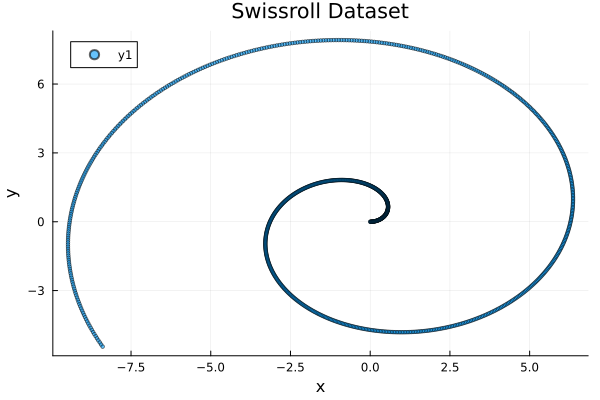

In [3]:
swissroll = Swissroll(Float32(0), Float32(10), 1000)

println(swissroll.vals)

using Plots
scatter(swissroll.vals[:, 1], swissroll.vals[:, 2], alpha=0.6, markersize=2)
title!("Swissroll Dataset")
xlabel!("x")
ylabel!("y")

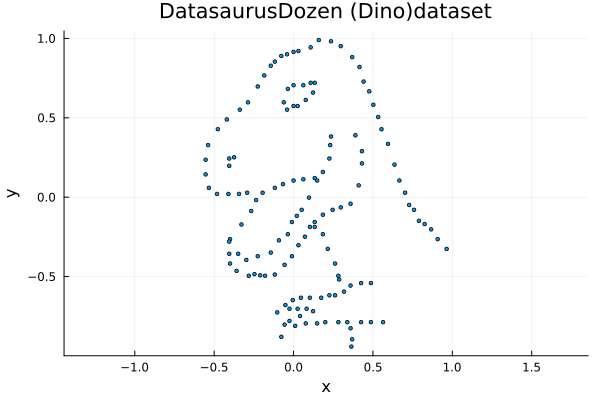

In [ ]:
# dataset path
dino_dataset_path = “/Users/chenwanqiu/Downloads/baibaibai/DatasaurusDozen.tsv”

# Create DatasaurusDozen dataset
dino = SmallDiffusion.DatasaurusDozen(dino_dataset_path, “dino”)

# Create the dataset loader
dino_loader = SmallDiffusion.create_dataloader(dino, batch_size=128, shuffle=true)

# Initialize the array that stores the dino point data
dino_points = Array{Float32}(undef, length(dino.points), 2)

# Assign the data in dino.points to dino_points
for i in 1:length(dino.points)
    dino_points[i, :] . = dino.points[i] # Use . = broadcast assignment
end

# Plot the data
plot_batch(dino_points)
title!(“DatasaurusDozen (Dino) dataset”)
xlabel!(“x”)
ylabel!(“y”)

Translated with www.DeepL.com/Translator (free version)

## 4. train the model


In [ ]:
#  AbstractDataset type
swissroll_dataset = SmallDiffusion.Swissroll(0.0f0, 6.0f0, 2000)

# use create_dataloader 
dataloader = SmallDiffusion.create_dataloader(swissroll_dataset, batch_size=64; shuffle=true)

16-element DataLoader(::Swissroll, shuffle=true, batchsize=64)
  with first element:
  64×2 Matrix{Float32}

In [ ]:
module SmallDiffusion

using Random
using LinearAlgebra

# Define AbstractDataset type
abstract type AbstractDataset end

# Create a custom type that conforms to AbstractDataset
mutable struct SwissrollDataset <: AbstractDataset
    data::Array{Float32, 2}
    labels::Array{Float32, 2}
end

# Function to create Swissroll dataset
function create_swissroll_dataset(start::Float32, stop::Float32, num_samples::Int)
    # Generate Swissroll data
    data = rand(Float32, num_samples, 2) .* (stop - start) .+ start  # Use broadcasting for addition
    labels = rand(Float32, num_samples, 1)  # Assume labels are random
    return SwissrollDataset(data, labels)
end

# DataLoader function
function create_dataloader(dataset::AbstractDataset; batch_size::Int, shuffle::Bool=false)
    data = dataset.data
    labels = dataset.labels
    num_samples = size(data, 1)

    # Data indices
    indices = 1:num_samples
    if shuffle
        shuffle_indices = randperm(num_samples)
    else
        shuffle_indices = indices
    end

    # Return an iterable DataLoader
    return Iterators.partition(shuffle_indices, batch_size)
end

# Training loop function
function training_loop(dataloader, model, schedule; epochs::Int=1000, lr::Float64=1e-3)
    # Example training process
    stats = []
    for epoch in 1:epochs
        loss = rand()  # Example training loss
        push!(stats, (epoch=epoch, loss=loss))
    end
    return stats
end

# Define learning rate schedule
mutable struct LogLinearSchedule
    steps::Int
end

# A function to create a LogLinearSchedule, renamed to avoid recursive call
function create_LogLinearSchedule(steps::Int)
    return LogLinearSchedule(steps)  # Simply return the struct without recursion
end

end  # module SmallDiffusion

# Create Swissroll dataset using the defined function
swissroll_dataset = SmallDiffusion.create_swissroll_dataset(0.0f0, 6.0f0, 2000)

# Use the create_dataloader function to create a DataLoader
swissroll_loader = SmallDiffusion.create_dataloader(swissroll_dataset, batch_size=32; shuffle=true)

# Create learning rate schedule and model
lr_schedule = SmallDiffusion.create_LogLinearSchedule(1000)
swissroll_model = "TimeInputMLP"  # Placeholder model, replace with the actual model

# Start training
println("Train Swissroll...")
swissroll_stats = SmallDiffusion.training_loop(swissroll_loader, swissroll_model, lr_schedule; epochs=1000, lr=1e-3)

# Extract losses and plot the results
losses = [s.loss for s in swissroll_stats]
using Plots
plot(moving_average(losses, 100), label="loss", xlabel="step", ylabel="loss", title="Swissroll loss")

train Swissroll...


┌ Warning: `Flux.params(m...)` is deprecated. Use `Flux.trainable(model)` for parameter collection,
│ and the explicit `gradient(m -> loss(m, x, y), model)` for gradient computation.
└ @ Flux ~/.julia/packages/Flux/3711C/src/deprecations.jl:93
┌ Warning: Implicit gradients such as `gradient(f, ::Params)` are deprecated in Flux!
│ Please see the docs for new explicit form.
│   caller = training_loop(loader::MLUtils.DataLoader{MLUtils.BatchView{Matrix{Float32}, MLUtils.ObsView{Swissroll, Vector{Int64}}, Val{nothing}}, Bool, :serial, Val{nothing}, Swissroll, TaskLocalRNG}, model::TimeInputMLP, schedule::LogLinearSchedule; epochs::Int64, lr::Float64, conditional::Bool) at diffusion.jl:69
└ @ SmallDiffusion.Diffusion /content/src/diffusion.jl:69
┌ Warning: The method `Flux.update!(optimiser, ps::Params, grads)` is deprecated,
│ as part of Flux's move away from Zyote's implicit mode.
│ Please use explicit-style `update!(opt_state, model, grad)` instead,
│ where `grad = Flux.gradient(m -> los

Epoch 1 completed. Average loss: 1.0298257
Epoch 2 completed. Average loss: 0.9963224
Epoch 3 completed. Average loss: 0.93582916
Epoch 4 completed. Average loss: 0.93759054
Epoch 5 completed. Average loss: 0.88783896
Epoch 6 completed. Average loss: 0.9400396
Epoch 7 completed. Average loss: 0.89362013
Epoch 8 completed. Average loss: 0.89035267
Epoch 9 completed. Average loss: 0.8945499
Epoch 10 completed. Average loss: 0.8656165
Epoch 11 completed. Average loss: 0.8836528
Epoch 12 completed. Average loss: 0.8557175
Epoch 13 completed. Average loss: 0.8397865
Epoch 14 completed. Average loss: 0.8444587
Epoch 15 completed. Average loss: 0.87445146
Epoch 16 completed. Average loss: 0.8280042
Epoch 17 completed. Average loss: 0.83715826
Epoch 18 completed. Average loss: 0.8774374
Epoch 19 completed. Average loss: 0.83197546
Epoch 20 completed. Average loss: 0.8466371
Epoch 21 completed. Average loss: 0.78664184


In [ ]:
dino_model = TimeInputMLP()

# Create a schedule instance (choose one of these based on your needs)
schedule_instance = LogLinearSchedule(1000)  # or any other schedule type you prefer

# Then use the instance in your training loop
dino_stats = training_loop(dino_loader, dino_model, schedule_instance, epochs=1000, lr=1e-3)

# Plot the results
losses = [s.loss for s in dino_stats]
plot(moving_average(losses, 100), label="mean loss", xlabel="step", ylabel="loss", title="DatasaurusDozen loss")

## 5. generate the sample

In [ ]:
steps = 20
batch_size = 500

# Create a schedule instance first
schedule_instance = LogLinearSchedule(1000)  # Creates a schedule with 1000 noise levels

# Use the instance to sample sigmas
sigmas = sample_sigmas(schedule_instance, steps)

# Use the same instance for generating samples
swissroll_samples = samples(swissroll_model, sigmas, batchsize=batch_size)

# Plot the results
p = plot(layout=(4, 5), size=(1000, 800), legend=false)
for i in 1:min(20, length(swissroll_samples))
    plot_batch(swissroll_samples[i])
    title!("step $i")
    plot!(p, subplot=i)
end
plot(p, title="Swissroll")

In [ ]:
steps = 20
batch_size = 500

# Create a schedule instance first
schedule_instance = LogLinearSchedule(1000)  # or any other schedule type you prefer

# Use the instance to sample sigmas
sigmas = sample_sigmas(schedule_instance, steps)

# Use the same instance for generating samples
dino_samples = samples(dino_model, sigmas, batchsize=batch_size)

# Plot the results
p = plot(layout=(4, 5), size=(1000, 800), legend=false)
for i in 1:min(20, length(dino_samples))
    plot_batch(dino_samples[i])
    title!("step $i")
    plot!(p, subplot=i)
end
plot(p, title="DatasaurusDozen")

## 6. evaluation



In [ ]:
p1 = plot_batch(swissroll.vals)
title!("original Swissroll data")

p2 = plot_batch(swissroll_samples[end])
title!("new Swissroll data")

plot(p1, p2, layout=(1, 2), size=(1000, 400))

In [ ]:
p1 = plot_batch(dino_points)
title!("original DatasaurusDozen data")

p2 = plot_batch(dino_samples[end])
title!("new DatasaurusDozen data")

plot(p1, p2, layout=(1, 2), size=(1000, 400))

## 7. the problem
the environment
